![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [5]:
df.info() #size va price ustunlarining tipi object bo'lib qolipdi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df['size'] = df['size'].astype(float)# size ustunida string tipidagi so'zlar bor ekan

ValueError: could not convert string to float: 'Площадьземли:1сот'

In [ ]:
df = df[df['size'] != 'Площадьземли:1сот']
df['size'] = df['size'].astype(float)#sizeni floatga o'tkazdik

In [8]:
df['price'] = df['price'].astype(float)#priceda ham so'zlar bor ekan

ValueError: could not convert string to float: 'Договорная'

In [9]:
df = df[df['price'].str.isdigit() != False]

In [10]:
df['price'] = df['price'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 466.6+ KB


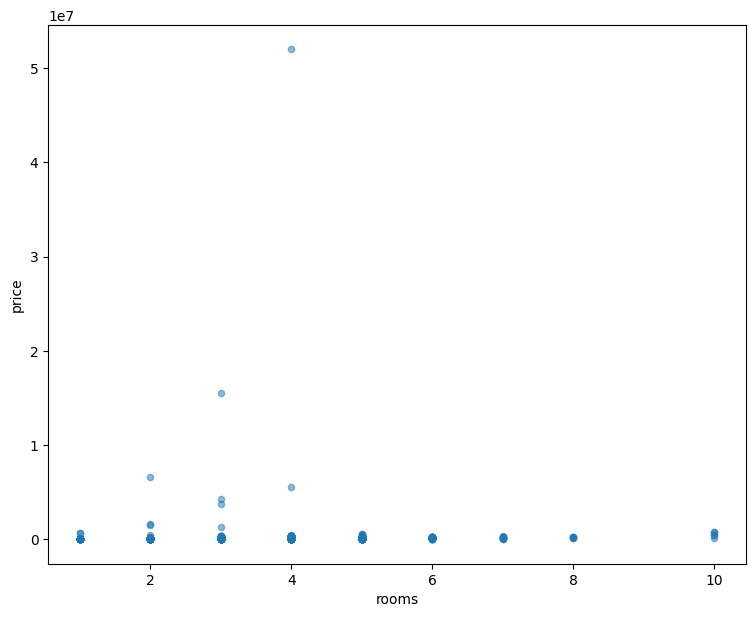

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
df.plot(kind='scatter', x="rooms", y="price", alpha=0.5, figsize=(9,7))
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 466.6+ KB


In [14]:
df[df['price']<250_000].shape#uylar narxi asosan 250000dan kichik ekan

(7349, 7)

In [15]:
df = df[df['price']<250_000]
df.shape

(7349, 7)

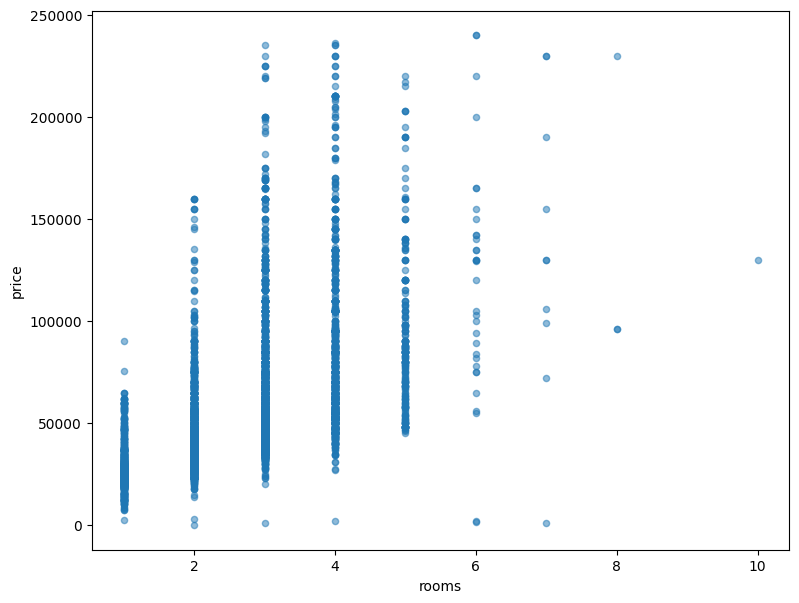

In [16]:
df.plot(kind='scatter', x="rooms", y="price", alpha=0.5, figsize=(9,7))
plt.show()

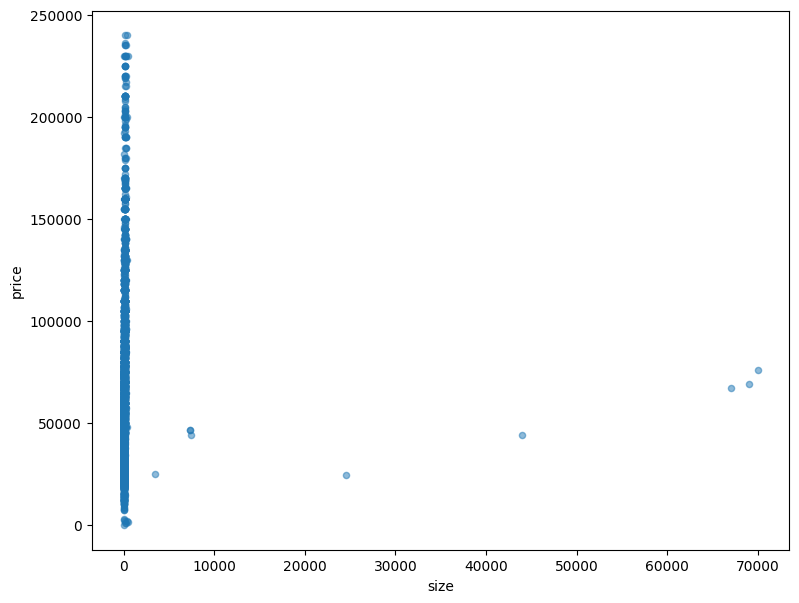

In [17]:
df.plot(kind='scatter', x="size", y="price", alpha=0.5, figsize=(9,7))
plt.show()

In [18]:
df[df['size']<250].shape#aksar uylar maydoni 250 dan kichik

(7325, 7)

In [19]:
df = df[df['size']<250]
df.shape

(7325, 7)

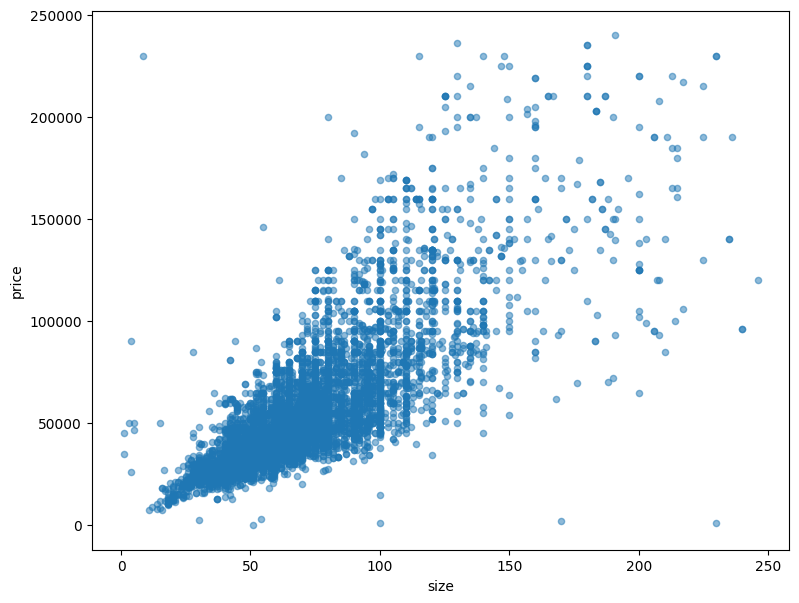

In [20]:
df.plot(kind='scatter', x="size", y="price", alpha=0.5, figsize=(9,7))
plt.show()

In [21]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0


In [22]:
df.corrwith(df['price'], numeric_only=True).sort_values(ascending=False)#Korrelyatsiyalar bilan tanishamiz

price         1.000000
size          0.788063
rooms         0.595552
max_levels    0.254983
level         0.078103
dtype: float64

In [23]:
df['size_per_room'] = df['size']/df['rooms']

<ipython-input-23-246fc51d09a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_per_room'] = df['size']/df['rooms']


In [24]:
df.corrwith(df['price'], numeric_only=True).sort_values(ascending=False)#o'rtacha xona maydoni bilan narxi yaxshiroq bog'liq ekan

price            1.000000
size             0.788063
rooms            0.595552
max_levels       0.254983
size_per_room    0.214526
level            0.078103
dtype: float64

In [25]:
housing_onehot = pd.get_dummies(df['district'])
housing_onehot = housing_onehot.astype(int)
housing_onehot

,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7560,0,0,0,0,0,0,0,0,0,0,0,1
7561,0,0,0,0,0,0,0,0,0,0,0,1
7562,0,0,0,0,0,0,0,1,0,0,0,0
7563,0,0,1,0,0,0,0,0,0,0,0,0


In [26]:
df.columns

Index(['location', 'district', 'rooms', 'size', 'level', 'max_levels', 'price',
       'size_per_room'],
      dtype='object')

In [27]:
df.drop('location', axis=1, inplace=True)

<ipython-input-27-f2401cdaffd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('location', axis=1, inplace=True)


In [67]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=45)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#Pipeline quramiz
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [30]:
from sklearn.compose import ColumnTransformer

num_attribs = ['size', 'rooms', 'level', 'max_levels', 'size_per_room']
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [68]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared[:5]

array([[-0.35674941, -0.56905761, -0.74739533, -1.1536898 ,  0.23440153,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 0.23755088,  0.39288053,  0.1443654 , -0.3849631 , -0.32191999,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-0.02658258,  0.39288053, -0.30151497,  1.1524903 , -0.69280101,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.191666  , -0.56905761,  0.1443654 ,  0.3837636 ,  0.58210248,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        

#Chiziqli regressiya

In [59]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(X_prepared, y)

LinearRegression()

In [60]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

In [61]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [62]:
y_predicted = LR_model.predict(X_test_prepared)

In [36]:
import numpy as np

In [63]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

18074.20330205589


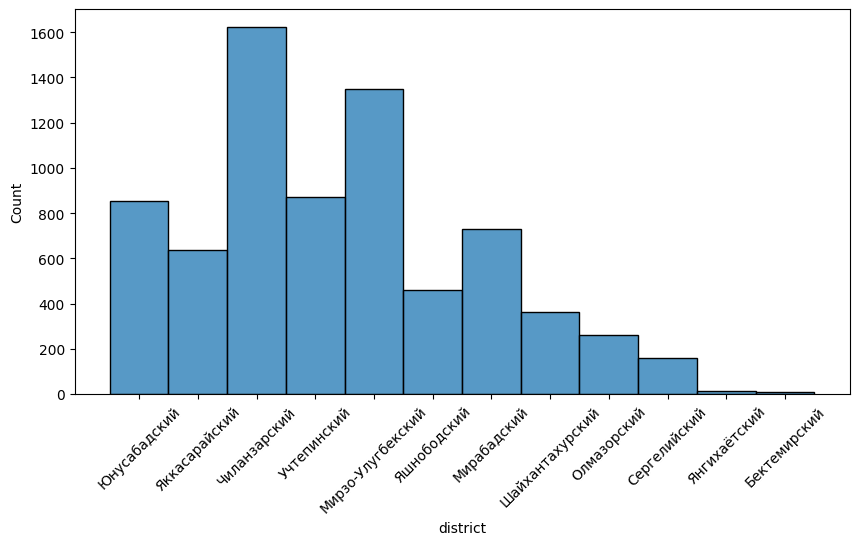

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='district')
plt.xticks(rotation=45)
plt.show()

#Cross validation

In [75]:
X_full = df.drop("price", axis=1)
y_full = df["price"].copy()

X_full_prepared = full_pipeline.transform(X_full)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [47]:
from sklearn.model_selection import cross_val_score

In [55]:
scores = cross_val_score(LR_model, X_full_prepared, y_full, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [56]:
display_scores(LR_rmse_scores)

Scores: [15823.78659066 16613.52987537 22288.87704589 19115.12800182
 20372.91604033 21110.89423768 17646.32159361 17619.91016121
 17569.80800407 15718.82541778]
Mean: 18387.9996968426
Std.dev: 2139.1006558440477


Decision tree

In [77]:
from sklearn.tree import DecisionTreeRegressor
Tr_model = DecisionTreeRegressor()
Tr_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [78]:
y_predicted = Tr_model.predict(X_test_prepared)

In [79]:
tr_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
tr_rmse = np.sqrt(tr_mse)
print(tr_rmse)

20415.178166701135


Cross validation for decision tree model

In [80]:
scores = cross_val_score(Tr_model, X_full_prepared, y_full, scoring="neg_mean_squared_error", cv=10)
Tr_rmse_scores = np.sqrt(-scores)
display_scores(Tr_rmse_scores)

Scores: [17199.60578554 19607.56159631 24692.25550505 20544.53304179
 23405.83343474 23909.50803785 18874.89260792 21242.52528239
 19773.03991586 16715.80132449]
Mean: 20596.555653195137
Std.dev: 2593.8845226060516


In [73]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [74]:
y_predicted = RF_model.predict(X_test_prepared)
RF_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
RF_rmse = np.sqrt(lin_mse)
print(lin_rmse)

18074.20330205589


#cross validation for random forest

In [76]:
scores = cross_val_score(RF_model, X_full_prepared, y_full, scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-scores)
display_scores(RF_rmse_scores)

Scores: [12964.38685174 13617.75737628 19632.87585364 17627.74147343
 17661.0894986  19570.55470549 15336.52553805 16427.09485554
 15228.98057197 13712.81165663]
Mean: 16177.981838135262
Std.dev: 2288.6015404691757


In [82]:
df['price'].median()

46000.0